# Quantifying Gentrification in New York City
#### Urban Data FA2021 | Emma Condie, Marie Demple, and Sarang Pramode | 12/7/2021

# Processing 311 data

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#installing libraries
!pip install geopandas
!pip install rtree geopandas
!pip install geoplot
import os
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

## Part 1: Loading, preprocessing and concatenating 311 data from each borough for 2010 and 2019

### This section is commented out because we are not providing the raw 311 data files from OpenData with our notebook (the files were too large to upload to GitHub and my laptop did not have enough memory to compress the files). Keeping the cells here so you can see what we did in terms of preprocessing:

In [ ]:
##loading in 311 data for Queens (choosing columns and setting datetime format)
#que = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "311_Queens.csv"), 
#                       infer_datetime_format=True,  
#                       low_memory=False, 
#                       usecols=['Created Date', 'Complaint Type', 'Latitude', 'Longitude', 'Location'])

In [ ]:
##loading in 311 data for Bronx (choosing columns and setting datetime format)
#bx = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "311_Bronx.csv"), 
#                       infer_datetime_format=True,  
#                       low_memory=False, 
#                       usecols=['Created Date', 'Complaint Type', 'Latitude', 'Longitude', 'Location'])

In [ ]:
##loading in 311 data for Brooklyn (choosing columns and setting datetime format)
#bk = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "311_Brooklyn.csv"), 
#                       infer_datetime_format=True,  
#                       low_memory=False, 
#                       usecols=['Created Date', 'Complaint Type', 'Latitude', 'Longitude', 'Location'])

In [ ]:
##loading in 311 data for Staten Island (choosing columns and setting datetime format)
#stat = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "311_Staten_Island.csv"), 
#                       infer_datetime_format=True,  
#                       low_memory=False, 
#                       usecols=['Created Date', 'Complaint Type', 'Latitude', 'Longitude', 'Location'])

In [ ]:
##loading in 311 data for Manhattan (choosing columns and setting datetime format)
#man = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "311_Manhattan.csv"), 
#                       infer_datetime_format=True,  
#                       low_memory=False, 
#                       usecols=['Created Date', 'Complaint Type', 'Latitude', 'Longitude', 'Location'])

In [ ]:
##extracting year from 'Created Date' column and creating filtered df's for 2010 and 2019:
#boro_list = [bx, bk, man, que, stat]

#for i in boro_list:
#  i['Year'] = i['Created Date'].str[6:10]

#bx_2010 = bx[bx['Year'] == '2010']
#bx_2019 = bx[bx['Year'] == '2019']
#bk_2010 = bk[bk['Year'] == '2010']
#bk_2019 = bk[bk['Year'] == '2019']
#man_2010 = man[man['Year'] == '2010']
#man_2019 = man[man['Year'] == '2019']
#que_2010 = que[que['Year'] == '2010']
#que_2019 = que[que['Year'] == '2019']
#stat_2010 = stat[stat['Year'] == '2010']
#stat_2019 = stat[stat['Year'] == '2019']

In [ ]:
#stat_2010.to_csv('Calls_311_2010.csv', mode='a', header=False)
#stat_2019.to_csv('Calls_311_2019.csv', mode='a', header=False)

In [ ]:
##concatenating all borough df's for 2010
#stat_que_10 = pd.concat([stat_2010, que_2010], ignore_index=True)
#stat_que_man_10 = pd.concat([stat_que_10, man_2010], ignore_index=True)
#stat_que_man_bk_10 = pd.concat([stat_que_man_10, bk_2010], ignore_index=True)
#calls_2010_all = pd.concat([stat_que_man_bk_10, bx_2010], ignore_index=True)

##concatenating all borough df's for 2019
#stat_que_19 = pd.concat([stat_2019, que_2019], ignore_index=True)
#stat_que_man_19 = pd.concat([stat_que_19, man_2019], ignore_index=True)
#stat_que_man_bk_19 = pd.concat([stat_que_man_19, bk_2019], ignore_index=True)
#calls_2019_all = pd.concat([stat_que_man_bk_19, bx_2019], ignore_index=True)

In [ ]:
##checkpoint to export df's to csv
#calls_2010_all.to_csv('calls_2010_all.csv')
#calls_2019_all.to_csv('calls_2019_all.csv')

## Part 2: More preprocessing 311 data for 2010 and 2019 (all boroughs)

In [ ]:
#uncomment this cell to load in csv's from part 1
calls_2010_all = pd.read_csv("calls_2010_all.csv", low_memory=False)
calls_2019_all = pd.read_csv("calls_2019_all.csv", low_memory=False)

In [ ]:
#dropping nulls from latitude and longitude columns
calls_2010_all.dropna(subset=['Latitude', 'Longitude'], inplace=True)
calls_2019_all.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [ ]:
#dropping columns we don't need:
calls_2010_all.drop(columns=['Location', 'Created Date'], inplace=True)
calls_2019_all.drop(columns=['Location', 'Created Date'], inplace=True)

In [ ]:
#dictionary to map complaint descriptions to categories
cat = {'Blocked Driveway':'Streets/Traffic', 'Taxi Complaint':'Streets/Traffic', 'Traffic':'Streets/Traffic','Illegal Parking':'Streets/Traffic', 'Derelict Vehicle':'Streets/Traffic', 'Broken Muni Meter':'Streets/Traffic', 'Derelict Vehicles':'Streets/Traffic', 'Derelict Bicycle':'Streets/Traffic', 'Adopt-A-Basket':'Streets/Traffic', 'Bike Rack Condition':'Streets/Traffic', 'OEM Disabled Vehicle':'Streets/Traffic', 'Traffic/Illegal Parking':'Streets/Traffic',
       'Noise - Residential': 'Noise', 'Noise - Vehicle': 'Noise', 'Noise - House of Worship': 'Noise', 'Noise - Commercial': 'Noise', 'Noise - Street/Sidewalk': 'Noise', 'Noise': 'Noise', 'Noise - Park': 'Noise', 'Noise - Helicopter': 'Noise', 'Collection Truck Noise': 'Noise',
       'Water System':'Environmental/Health', 'Sewer':'Environmental/Health', 'Overgrown Tree/Branches':'Environmental/Health', 'Damaged Tree':'Environmental/Health', 'Dead Tree':'Environmental/Health', 'New Tree Request':'Environmental/Health', 'Sanitation Condition':'Environmental/Health', 'Dirty Conditions':'Environmental/Health', 'Water Conservation':'Environmental/Health', 'Air Quality':'Environmental/Health', 'Asbestos':'Environmental/Health', 'Indoor Air Quality':'Environmental/Health', 'Water Quality':'Environmental/Health', 'Lead':'Environmental/Health', 'Drinking Water':'Environmental/Health', 'Industrial Waste':'Environmental/Health', 'Poison Ivy':'Environmental/Health', 'Recycling Enforcement':'Environmental/Health', 'Mold':'Environmental/Health', 'Hazardous Material':'Environmental/Health', 'Radioactive Material':'Environmental/Health', 'Water Maintenance':'Environmental/Health', 'Health':'Environmental/Health',
       'Building/Use':'Property Damage', 'Broken Parking Meter':'Property Damage', 'Sidewalk Condition':'Property Damage', 'Electrical':'Property Damage', 'Street Light Condition':'Property Damage', 'Graffiti':'Property Damage', 'Elevator':'Property Damage', 'Maintenance or Facility':'Property Damage', 'Vending':'Property Damage', 'Window Guard':'Property Damage', 'Root/Sewer/Sidewalk Condition':'Property Damage', 'Illegal Tree Damage':'Property Damage', 'Vacant Lot':'Property Damage', 'Boilers':'Property Damage', 'Plumbing':'Property Damage', 'Plant':'Property Damage', 'PAINT - PLASTER':'Property Damage', 'ELECTRIC':'Property Damage', 'APPLIANCE':'Property Damage', 'PLUMBING':'Property Damage', 'HEATING':'Property Damage',
       'Rodent':'Animals/Vermin', 'Unsanitary Pigeon Condition':'Animals/Vermin', 'Unsanitary Animal Pvt Property':'Animals/Vermin', 'Harboring Bees/Wasps':'Animals/Vermin', 'Unleashed Dog':'Animals/Vermin', 'Animal in a Park':'Animals/Vermin', 'Illegal Animal Kept as Pet':'Animals/Vermin', 'Trapping Pigeon':'Animals/Vermin', 'Illegal Animal Sold':'Animals/Vermin', 'Animal Facility - No Permit':'Animals/Vermin', 'Unsanitary Animal Facility':'Animals/Vermin',
       'Violation of Park Rules':'Public Nuisance', 'Illegal Fireworks':'Public Nuisance', 'Smoking':'Public Nuisance', 'Drinking':'Public Nuisance', 'Overflowing Litter Baskets':'Public Nuisance', 'Disorderly Youth':'Public Nuisance', 'Posting Advertisement':'Public Nuisance', 'Beach/Pool/Sauna Complaint':'Public Nuisance', 'Homeless Encampment':'Public Nuisance', 'Bike/Roller/Skate Chronic':'Public Nuisance', 'Discipline and Suspension':'Public Nuisance', 'Urinating in Public':'Public Nuisance', 'Squeegee':'Public Nuisance', 'Panhandling':'Public Nuisance',
       'General Construction/Plumbing':'Construction Violation', 'Hazardous Materials':'Construction Violation', 'Scaffold Safety':'Construction Violation', 'Stalled Sites':'Construction Violation', 'Cranes and Derricks':'Construction Violation', 'BEST/Site Safety':'Construction Violation', 'GENERAL CONSTRUCTION':'Construction Violation', 'CONSTRUCTION':'Construction Violation', 'NONCONST':'Construction Violation', 'Safety':'Construction Violation',
       'Consumer Complaint':'Consumer Complaint', 'Food Establishment':'Consumer Complaint', 'For Hire Vehicle Complaint':'Consumer Complaint', 'Summer Camp':'Consumer Complaint', 'Food Poisoning':'Consumer Complaint', 'Senior Center Complaint':'Consumer Complaint', 'Calorie Labeling':'Consumer Complaint', 'Tattooing':'Consumer Complaint', 'Taxi Compliment':'Consumer Complaint', 'X-Ray Machine/Equipment':'Consumer Complaint', 'Trans Fat':'Consumer Complaint', 'Lifeguard':'Consumer Complaint', 'Bottled Water':'Consumer Complaint', 'Transportation Provider Complaint':'Consumer Complaint', 'Non-Residential Heat':'Consumer Complaint', 'Legal Services Provider Complaint':'Consumer Complaint',
       'Traffic Signal Condition':'City Services', 'Street Condition':'City Services', 'Municipal Parking Facility':'City Services', 'Street Sign - Damaged':'City Services', 'Street Sign - Dangling':'City Services', 'School Maintenance':'City Services', 'Curb Condition':'City Services', 'Bridge Condition':'City Services', 'Highway Condition':'City Services', 'City Vehicle Placard Complaint':'City Services', 'Public Payphone Complaint':'City Services', 'Public Toilet':'City Services', 'Bus Stop Shelter Placement':'City Services', 'Sweeping/Missed-Inadequate':'City Services', 'Snow':'City Services', 'Teaching/Learning/Instruction':'City Services', 'Highway Sign - Missing':'City Services', 'DOF Parking - Payment Issue':'City Services', 'Highway Sign - Dangling':'City Services', 'Highway Sign - Damaged':'City Services',
       'Special Projects Inspection Team (SPIT)': 'Other', 'Non-Emergency Police Matter': 'Other', 'Emergency Response Team (ERT)': 'Other', 'Investigations and Discipline (IAD)': 'Other', 'Other Enforcement': 'Other', 'Forensic Engineering': 'Other', 'Found Property': 'Other', 'Registration and Transfers': 'Other', 'No Child Left Behind': 'Other', 'Special Natural Area District (SNAD)': 'Other', 'Portable Toilet': 'Other', 'Miscellaneous Categories': 'Other', 'Parent Leadership': 'Other',
       'Abandoned Vehicle':'Streets/Traffic', 'Animal-Abuse':'Animals/Vermin', 'Drug Activity':'Public Nuisance', 'UNSANITARY CONDITION': 'Environmental/Health', 'WATER LEAK':'Property Damage', 'PAINT/PLASTER':'Property Damage', 'Standing Water':'Environmental/Health', 'HEAT/HOT WATER':'Property Damage', 'Missed Collection (All Materials)':'City Services', 'Building Marshals office':'Construction Violation', 'Borough Office':'City Services', 'DOOR/WINDOW':'Property Damage', 'Construction Safety Enforcement':'Construction Violation',
       'FLOORING/STAIRS':'Property Damage', 'Lost Property':'Property Damage', 'Street Sign - Missing':'City Services', 'GENERAL': 'Other', 'Dead/Dying Tree':'Environmental/Health', 'SAFETY':'Construction Violation', 'Mobile Food Vendor':'Consumer Complaint', 'Request Large Bulky Item Collection':'City Services', 'General': 'Other', 'Homeless Person Assistance':'Public Nuisance', 'Unsanitary Condition':'Environmental/Health', 'Missed Collection':'City Services', 'For Hire Vehicle Report':'Streets/Traffic', 'Green Taxi Report':'Streets/Traffic', 'Indoor Sewage':'Environmental/Health', 'Day Care':'Consumer Complaint', 'Mosquitoes':'Environmental/Health', 'Green Taxi Complaint':'Consumer Complaint', 'Electronics Waste Appointment':'City Services', 'Bus Stop Shelter Complaint':'City Services', 'Litter Basket / Request':'City Services', 'Executive Inspections': 'Other', 'Pet Shop':'Consumer Complaint', 'Unlicensed Dog':'Animals/Vermin', 'Sweeping/Missed':'City Services', 'Taxi Report':'Streets/Traffic', 'Sustainability Enforcement':'Environmental/Health', 'Fire Alarm - Replacement':'City Services', 'Construction':'Construction Violation', 'LinkNYC':'City Services', 'Quality of Life':'Public Nuisance', 'Construction Lead Dust':'Construction Violation', 'Snow Removal':'City Services', 'Ferry Inquiry':'City Services', 'Peeling Paint':'Environmental/Health', 'ELEVATOR':'Property Damage', 'OUTSIDE BUILDING': 'Other', 'Electronics Waste':'Environmental/Health', 'Appliance':'Property Damage', 'Cooling Tower':'Environmental/Health',
       'Outside Building': 'Other', 'Animal Abuse':'Animals/Vermin', 'DRIE': 'Other', 'DOF Property - Payment Issue':'City Services', 'DPR Internal': 'Other', 'Special Operations': 'Other', 'Dispatched Taxi Complaint':'Streets/Traffic', 'Facades':'Construction Violation', 'Sweeping/Inadequate':'City Services', 'Taxpayer Advocate Inquiry':'City Services', 'DOF Property - Reduction Issue': 'Other', 'Foam Ban Enforcement':'City Services', 'Request Xmas Tree Collection':'City Services', 'FATF': 'Other', 'Tanning':'Consumer Complaint', 'Advocate - Lien': 'Other',
       'Employee Behavior':'Consumer Complaint', 'Advocate-Foreclosure':'City Services', 'Advocate-Commercial Exemptions':'City Services', 'DSNY Spillage':'Environmental/Health', 'Single Occupancy Bathroom':'Consumer Complaint', 'Internal Code': 'Other', 'Dept of Investigations': 'Other', 'SRDE': 'Other', 'Overflowing Recycling Baskets':'Environmental/Health', 'FHV Licensee Complaint': 'Other', 'DEP Street Condition':'Streets/Traffic', 'Dirty Condition':'Environmental/Health', 'Ferry Complaint':'City Services', 'Dispatched Taxi Compliment':'Streets/Traffic', 'Water Leak':'Environmental/Health', 'Building Condition':'Property Damage', 'DEP Sidewalk Condition':'Streets/Traffic', 'Electric':'Property Damage', 'Advocate-Business Tax':'City Services', 'Taxi Licensee Complaint':'Consumer Complaint', 'MSOTHER': 'Other', 'Ferry Permit':'City Services',
       'Missed Collection (All Materials)': 'City Services', 'Litter Basket / Request':'City Services',
       'Bus Stop Shelter Complaint': 'City Services', 'Street Sign - Missing':'Streets/Traffic', "'Quality of life' Complaints":"'Quality of life' Complaints"}

In [ ]:
#creating new Category column using complaint type dictionary
calls_2010_all['Category'] = calls_2010_all['Complaint Type'].map(cat)
calls_2019_all['Category'] = calls_2019_all['Complaint Type'].map(cat)

In [ ]:
#checking that it worked
null = calls_2010_all[calls_2010_all['Category'].isnull()]
print(null['Complaint Type'].unique())

[]


In [ ]:
#tweaking some of the category names
calls_2010_all.replace({'Property Damage':'Environment/Health/Living Conditions', 'Building Conditions': 'Environment/Health/Living Conditions','Environmental/Health': 'Environment/Health/Living Conditions',
                    'Public Nuisance':"'Quality of life' Complaints", 'Noise': "'Quality of life' Complaints"}, inplace=True)
calls_2019_all.replace({'Property Damage':'Environment/Health/Living Conditions', 'Building Conditions': 'Environment/Health/Living Conditions','Environmental/Health': 'Environment/Health/Living Conditions',
                    'Public Nuisance':"'Quality of life' Complaints", 'Noise': "'Quality of life' Complaints"}, inplace=True)

In [ ]:
#checking the counts for each category type for 2010
counts_2010_2 = calls_2010_all['Category'].value_counts()
pd.DataFrame(counts_2010_2)
sizes = counts_2010_2.to_list()
counts_2010_2

Environment/Health/Living Conditions    454609
'Quality of life' Complaints            210851
City Services                           179065
Streets/Traffic                         151196
Construction Violation                   53876
Consumer Complaint                       29220
Animals/Vermin                           27310
Other                                    16154
Name: Category, dtype: int64

In [ ]:
#checking the counts for each category type for 2019
counts_2019 = calls_2019_all['Category'].value_counts()
sizes2 = counts_2019.tolist()
counts_2019

Environment/Health/Living Conditions    840840
'Quality of life' Complaints            509032
Streets/Traffic                         427543
City Services                           291513
Construction Violation                   61365
Consumer Complaint                       46661
Animals/Vermin                           43873
Other                                    43604
Name: Category, dtype: int64

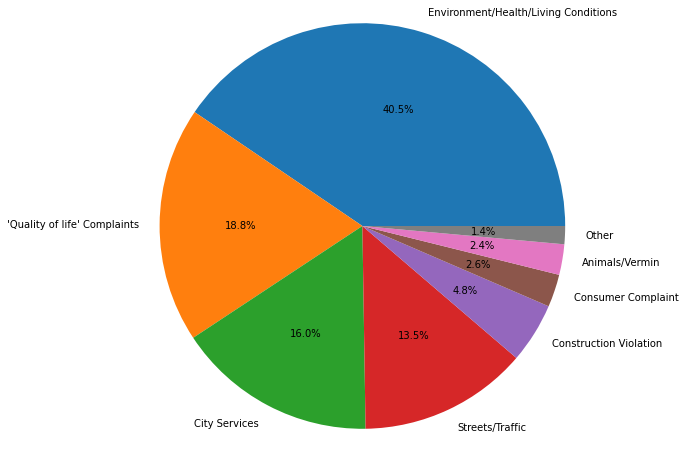

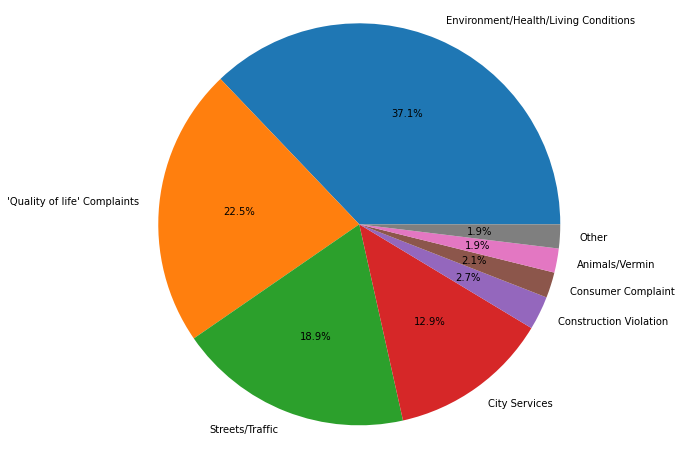

In [ ]:
#creating pie charts for each year from the category column
labels = ['Environment/Health/Living Conditions', "'Quality of life' Complaints", 'City Services', 'Streets/Traffic', 'Construction Violation', 'Consumer Complaint',
          'Animals/Vermin', 'Other']

labels2 = ['Environment/Health/Living Conditions', "'Quality of life' Complaints", 'Streets/Traffic', 'City Services', 'Construction Violation', 'Consumer Complaint',
           'Animals/Vermin', 'Other']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(8,8)

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig2.set_size_inches(8,8)

plt.show()

In [ ]:
#checkpoint to export current df's to csv
calls_2010_all.to_csv('calls_2010_clean.csv')
calls_2019_all.to_csv('calls_2019_clean.csv')

## Part 3: Spatial join with neighborhood shape file:

In [102]:
#uncomment this cell to read in csv from the last section
#calls_2010_all = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "calls_2010_clean.csv"), low_memory=False)
#calls_2019_all = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "calls_2019_clean.csv"), low_memory=False)

In [103]:
#one-hot encoding 'Category' column so that we can get a count for each type of call
tempdf = pd.get_dummies(calls_2010_all['Category'])
calls_2010_hot = pd.merge(left=calls_2010_all, right=tempdf, left_index=True, right_index=True)
calls_2010_hot = calls_2010_hot.drop(columns='Category')

In [104]:
tempdf = pd.get_dummies(calls_2019_all['Category'])
calls_2019_hot = pd.merge(left=calls_2019_all, right=tempdf, left_index=True, right_index=True)
calls_2019_hot = calls_2019_hot.drop(columns='Category')

In [105]:
#creating gdf's from calls df's
calls_2010_gpd = gpd.GeoDataFrame(calls_2010_hot)
calls_2019_gpd = gpd.GeoDataFrame(calls_2019_hot)

In [106]:
#setting geometry column from latitude and longitude columns
calls_2010_gpd['geometry'] = gpd.points_from_xy(x=calls_2010_gpd['Longitude'], y=calls_2010_gpd['Latitude'])
calls_2019_gpd['geometry'] = gpd.points_from_xy(x=calls_2019_gpd['Longitude'], y=calls_2019_gpd['Latitude'])

In [6]:
#reading in NYC neighborhood map shape file
nyc_shp = gpd.read_file(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "geo_export_ef5f675e-e040-4d1f-9d1a-9ce08148315f.shp"))

In [108]:
#checking shape file crs
print(nyc_shp.crs)

epsg:4326


In [109]:
#setting crs for gdf's
calls_2010_gpd.crs = 'epsg:4326'
calls_2019_gpd.crs = 'epsg:4326'

In [110]:
#checking that crs match
calls_2019_gpd.crs == nyc_shp.crs

True

In [111]:
#spatial join with neighborhood shape file for 2019
calls_map_2019 = gpd.sjoin(calls_2019_gpd, nyc_shp, how='right',op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [112]:
#spatial join with neighborhood shape file for 2010
calls_tracts_2010 = gpd.sjoin(calls_2010_gpd, nyc_shp, how='right',op='within')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [113]:
#grouping by 'ntaname' (neighborhood name), taking agg sum of each complaint type and first geometry value (since they are 1:1 with ntaname)
calls_map_2010_agg = calls_tracts_2010.groupby('ntaname').agg({"geometry":'first',"'Quality of life' Complaints":'sum', 'Animals/Vermin':'sum', 'City Services':'sum', 'Construction Violation':'sum', 'Consumer Complaint':'sum', 'Environment/Health/Living Conditions':'sum', 'Other':'sum', 'Streets/Traffic':'sum'}).reset_index()
calls_map_2019_agg = calls_map_2019.groupby('ntaname').agg({"geometry":'first',"'Quality of life' Complaints":'sum', 'Animals/Vermin':'sum', 'City Services':'sum', 'Construction Violation':'sum', 'Consumer Complaint':'sum', 'Environment/Health/Living Conditions':'sum', 'Other':'sum', 'Streets/Traffic':'sum'}).reset_index()

In [114]:
#calculating total # of calls by adding up # of calls of each type
calls_map_2019_agg['Total # of Calls'] = calls_map_2019_agg["'Quality of life' Complaints"] + calls_map_2019_agg["Animals/Vermin"] + calls_map_2019_agg["City Services"] + calls_map_2019_agg["Construction Violation"] + calls_map_2019_agg["Consumer Complaint"] + calls_map_2019_agg["Environment/Health/Living Conditions"] + calls_map_2019_agg["Other"] + calls_map_2019_agg["Streets/Traffic"]
calls_map_2010_agg['Total # of Calls'] = calls_map_2010_agg["'Quality of life' Complaints"] + calls_map_2010_agg["Animals/Vermin"] + calls_map_2010_agg["City Services"] + calls_map_2010_agg["Construction Violation"] + calls_map_2010_agg["Consumer Complaint"] + calls_map_2010_agg["Environment/Health/Living Conditions"] + calls_map_2010_agg["Other"] + calls_map_2010_agg["Streets/Traffic"]

In [115]:
#changing neighborhood df back to gdf
calls_2010_neighborhoodmap = gpd.GeoDataFrame(calls_map_2010_agg)
calls_2019_neighborhoodmap = gpd.GeoDataFrame(calls_map_2019_agg)

In [116]:
#setting crs for neighborhood map
calls_2010_neighborhoodmap.crs = 'epsg:4326'
calls_2019_neighborhoodmap.crs = 'epsg:4326'

Text(0.5, 1.0, 'Number of 311 calls in each neighborhood (2019)')

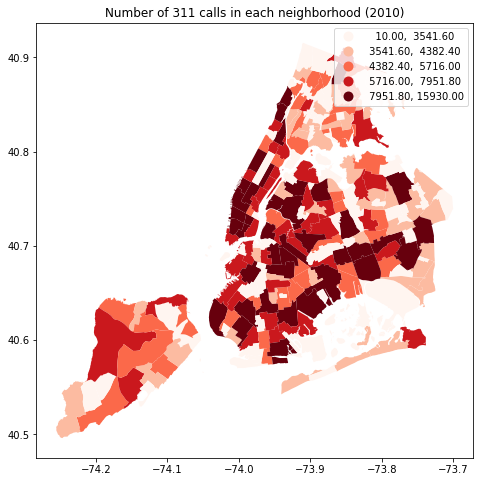

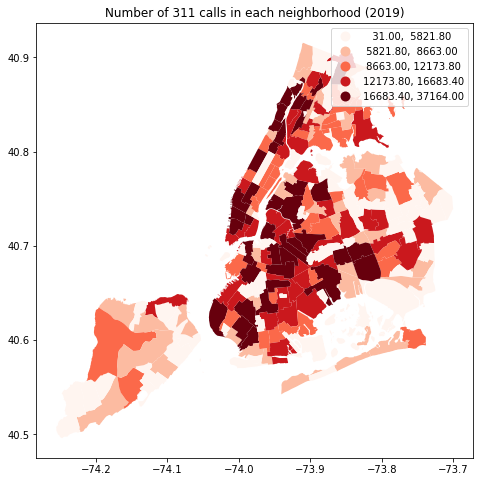

In [117]:
#plotting # of calls in each neighborhood for 2010 and 2019
calls_2010_neighborhoodmap.plot(column="Total # of Calls", figsize=(8,8), legend='True', cmap='Reds', scheme='quantiles')
plt.title('Number of 311 calls in each neighborhood (2010)')
calls_2019_neighborhoodmap.plot(column="Total # of Calls", figsize=(8,8), legend='True', cmap='Reds', scheme='quantiles')
plt.title('Number of 311 calls in each neighborhood (2019)')

In [118]:
#checkpoint to export files
calls_2010_neighborhoodmap.to_file('calls_2010_neighborhoodmap.shp')
calls_2019_neighborhoodmap.to_file('calls_2019_neighborhoodmap.shp')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  This is separate from the ipykernel package so we can avoid doing imports until


## Part 4: Combining and comparing 2010 and 2019, adding in gentrification score

In [78]:
#uncomment this cell to read in shapefiles for 2010 and 2019 neighborhood maps
#calls_2010_neighborhoodmap = gpd.read_file(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "calls_2010_neighborhoodmap.shp"))
#calls_2019_neighborhoodmap = gpd.read_file(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "calls_2019_neighborhoodmap.shp"))

In [79]:
#read in 2010 and 2019 gentrification index files
genscore_2019 = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "FINAL_GEN_2019.csv"))
genscore_2010 = pd.read_csv(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "FINAL_GEN_2010.csv"))

In [80]:
#creating geodataframes from genscore csv's
genscore_2010 = gpd.GeoDataFrame(genscore_2010)
genscore_2019 = gpd.GeoDataFrame(genscore_2019)

In [84]:
#set geometry
from shapely import wkt
genscore_2010['geometry'] = genscore_2010['geometry'].apply(wkt.loads)
genscore_2010 = genscore_2010.set_geometry("geometry")
genscore_2019['geometry'] = genscore_2019['geometry'].apply(wkt.loads)
genscore_2019 = genscore_2019.set_geometry("geometry")

In [82]:
#set crs
genscore_2019.crs = 'epsg:4326'
genscore_2010.crs = 'epsg:4326'

In [85]:
#spatial join with neighborhood map
gen_neighbs_2010 = gpd.sjoin(genscore_2010, nyc_shp, how='right', op='overlaps')
gen_neighbs_2019 = gpd.sjoin(genscore_2019, nyc_shp, how='right', op='overlaps')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


In [86]:
#group by neighborhood name, taking average gentrification index of census tracts within the neighborhood
gen_index_2010 = gen_neighbs_2010.groupby('ntaname').agg({'gen_INDEX_v2':'mean', 'geometry':'first'})
gen_index_2019 = gen_neighbs_2019.groupby('ntaname').agg({'gen_INDEX_v2':'mean', 'geometry':'first'})

In [87]:
#changing them to geodataframe
gen_index_2010 = gpd.GeoDataFrame(gen_index_2010)
gen_index_2019 = gpd.GeoDataFrame(gen_index_2019)

In [88]:
#setting crs
gen_index_2010.crs = 'epsg:4326'
gen_index_2019.crs = 'epsg:4326'

In [89]:
#renaming gen_index columns
gen_index_2010.rename(columns={'gen_INDEX_v2':'gen_index_2010'}, inplace=True)
gen_index_2019.rename(columns={'gen_INDEX_v2':'gen_index_2019'}, inplace=True)

In [90]:
#merging with 311 shape files
gen_index_311_2010 = gen_index_2010.merge(calls_2010_neighborhoodmap, on='ntaname')
gen_index_311_2019 = gen_index_2019.merge(calls_2019_neighborhoodmap, on='ntaname')

In [91]:
#merging 2010 and 2019 together on neighborhood name
gen_index_both = gen_index_311_2010.merge(gen_index_311_2019, on='ntaname')

In [92]:
#calculating final gentrification score for each neighborhood by subtracting 2010 from 2019 index, setting any negative scores to 0
gen_index_both['gen_index_final'] = gen_index_both['gen_index_2019'] - gen_index_both['gen_index_2010']
gen_index_both['gen_index_final'][gen_index_both['gen_index_final'] < 0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
#creating gentrification score final with negative values
gen_index_both['gen_index_final_2'] = gen_index_both['gen_index_2019'] - gen_index_both['gen_index_2010']

In [94]:
#sanity check
gen_index_both['gen_index_final'].describe()

count    195.000000
mean       4.645281
std        4.846609
min        0.000000
25%        0.528647
50%        3.856687
75%        6.958288
max       29.143665
Name: gen_index_final, dtype: float64

In [95]:
#calculating change in # of 311 calls for each category and overall
gen_index_both['Change in Total # of Calls'] = gen_index_both['Total # of_y'] - gen_index_both['Total # of_x']
gen_index_both['Quality of Life Complaints'] = gen_index_both["'Quality o_y"] - gen_index_both["'Quality o_x"]
gen_index_both['Animals/Vermin Reports'] = gen_index_both["Animals/Ve_y"] - gen_index_both["Animals/Ve_x"]
gen_index_both['City Services Complaints'] = gen_index_both["City Servi_y"] - gen_index_both["City Servi_x"]
gen_index_both['Construction Violations'] = gen_index_both["Constructi_y"] - gen_index_both["Constructi_x"]
gen_index_both['Consumer Complaints'] = gen_index_both["Consumer C_y"] - gen_index_both["Consumer C_x"]
gen_index_both['Environment & Health'] = gen_index_both["Environmen_y"] - gen_index_both["Environmen_x"]
gen_index_both['Other'] = gen_index_both["Other_y"] - gen_index_both["Other_x"]
gen_index_both['Streets/Traffic Complaints'] = gen_index_both["Streets/Tr_y"] - gen_index_both["Streets/Tr_x"]

In [96]:
#dropping extra geometry columns and renaming
gen_index_both.drop(columns=['geometry_y_x', 'geometry_x_y', 'geometry_y_y'], inplace=True)
gen_index_both.rename(columns={'geometry_x_x':'geometry'}, inplace=True)

In [97]:
#converting to a geodataframe
gen_311_map = gpd.GeoDataFrame(gen_index_both)
gen_311_map.set_geometry("geometry")
gen_311_map.crs = 'epsg:4326'

In [98]:
#checking range of column
gen_311_map['Change in Total # of Calls'].describe()

count      195.000000
mean      5858.492308
std       4473.634597
min        -12.000000
25%       2420.000000
50%       4991.000000
75%       8319.500000
max      23590.000000
Name: Change in Total # of Calls, dtype: float64

Text(0.5, 1.0, 'Change in # of 311 calls (from 2010-2019)')

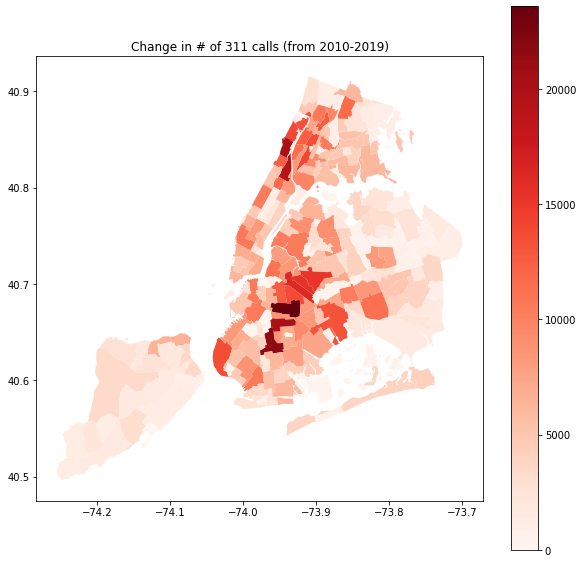

In [99]:
#plotting change in # of 311 calls
gen_311_map.plot('Change in Total # of Calls', cmap='Reds', figsize=(10,10), legend=True)
plt.title('Change in # of 311 calls (from 2010-2019)')

Text(0.5, 1.0, 'Neighborhood Gentrification Scores (change from 2010-2019)')

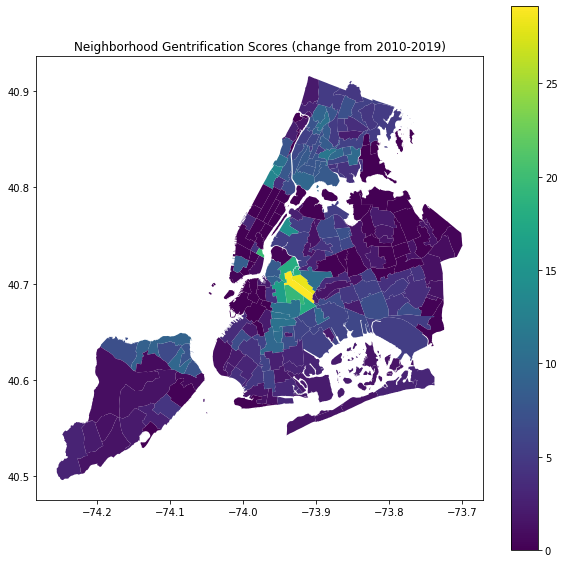

In [100]:
#creating final map for gentrification score
gen_311_map.plot('gen_index_final', figsize=(10,10), legend=True)
plt.title('Neighborhood Gentrification Scores (change from 2010-2019)')

In [101]:
#looking at range of values for gentrification score
gen_311_map['gen_index_final'].describe()

count    195.000000
mean       4.645281
std        4.846609
min        0.000000
25%        0.528647
50%        3.856687
75%        6.958288
max       29.143665
Name: gen_index_final, dtype: float64

In [102]:
#getting top 10 fastest gentrifying neighborhoods
gen_sorted = gen_311_map.sort_values('gen_index_final', ascending=False)
gen_sorted.head(10)

,ntaname,gen_index_2010,geometry,'Quality o_x,Animals/Ve_x,City Servi_x,Constructi_x,Consumer C_x,Environmen_x,Other_x,Streets/Tr_x,Total # of_x,gen_index_2019,'Quality o_y,Animals/Ve_y,City Servi_y,Constructi_y,Consumer C_y,Environmen_y,Other_y,Streets/Tr_y,Total # of_y,gen_index_final,gen_index_final_2,Change in Total # of Calls,Quality of Life Complaints,Animals/Vermin Reports,City Services Complaints,Construction Violations,Consumer Complaints,Environment & Health,Other,Streets/Traffic Complaints
25,Bushwick South,8.029206,"POLYGON ((-73.93230 40.70775, -73.93392 40.707...",2376.0,402.0,1414.0,722.0,188.0,4292.0,123.0,1144.0,10661.0,37.172871,8567.0,542.0,3000.0,1038.0,237.0,8679.0,445.0,4375.0,26883.0,29.143665,29.143665,16222.0,6191.0,140.0,1586.0,316.0,49.0,4387.0,322.0,3231.0
24,Bushwick North,8.065381,"POLYGON ((-73.90140 40.69159, -73.90189 40.691...",1830.0,326.0,753.0,424.0,171.0,3181.0,119.0,727.0,7531.0,36.210581,7918.0,616.0,2361.0,588.0,233.0,8354.0,357.0,2537.0,22964.0,28.145200,28.145200,15433.0,6088.0,290.0,1608.0,164.0,62.0,5173.0,238.0,1810.0
163,Stuyvesant Town-Cooper Village,26.661554,"MULTIPOLYGON (((-73.96237 40.72421, -73.96201 ...",151.0,13.0,153.0,6.0,13.0,185.0,17.0,197.0,735.0,46.403608,351.0,26.0,55.0,19.0,67.0,602.0,21.0,224.0,1365.0,19.742054,19.742054,630.0,200.0,13.0,-98.0,13.0,54.0,417.0,4.0,27.0
162,Stuyvesant Heights,5.550102,"POLYGON ((-73.91805 40.68721, -73.91800 40.686...",1999.0,495.0,1255.0,578.0,146.0,3344.0,104.0,656.0,8577.0,25.052902,6289.0,735.0,2761.0,845.0,233.0,8700.0,498.0,2315.0,22376.0,19.502800,19.502800,13799.0,4290.0,240.0,1506.0,267.0,87.0,5356.0,394.0,1659.0
56,East Williamsburg,16.715253,"POLYGON ((-73.92406 40.71411, -73.92404 40.714...",1270.0,123.0,1014.0,375.0,200.0,2194.0,91.0,606.0,5873.0,34.857766,3496.0,287.0,2268.0,528.0,355.0,4949.0,231.0,2305.0,14419.0,18.142513,18.142513,8546.0,2226.0,164.0,1254.0,153.0,155.0,2755.0,140.0,1699.0
124,Ocean Hill,3.871863,"POLYGON ((-73.90405 40.67922, -73.90349 40.678...",826.0,300.0,777.0,310.0,66.0,1803.0,40.0,405.0,4527.0,21.850251,2420.0,368.0,1396.0,403.0,130.0,5259.0,257.0,2505.0,12738.0,17.978388,17.978388,8211.0,1594.0,68.0,619.0,93.0,64.0,3456.0,217.0,2100.0
11,Bedford,8.413028,"POLYGON ((-73.94193 40.70073, -73.94372 40.700...",1819.0,374.0,1421.0,798.0,171.0,3706.0,140.0,813.0,9242.0,24.805281,6261.0,786.0,2911.0,1000.0,326.0,7349.0,485.0,2806.0,21924.0,16.392253,16.392253,12682.0,4442.0,412.0,1490.0,202.0,155.0,3643.0,345.0,1993.0
139,Queensbridge-Ravenswood-Long Island City,11.098287,"POLYGON ((-73.93453 40.77118, -73.93425 40.771...",707.0,53.0,688.0,208.0,125.0,1142.0,60.0,770.0,3753.0,25.589899,1839.0,112.0,904.0,299.0,217.0,1430.0,98.0,2996.0,7895.0,14.491612,14.491612,4142.0,1132.0,59.0,216.0,91.0,92.0,288.0,38.0,2226.0
101,Manhattanville,9.913030,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",1334.0,85.0,244.0,119.0,67.0,1007.0,26.0,155.0,3037.0,23.482972,3234.0,124.0,265.0,117.0,55.0,3897.0,204.0,428.0,8324.0,13.569942,13.569942,5287.0,1900.0,39.0,21.0,-2.0,-12.0,2890.0,178.0,273.0
109,Morningside Heights,11.303847,"POLYGON ((-73.95210 40.81144, -73.95259 40.810...",1573.0,181.0,483.0,162.0,122.0,1441.0,66.0,392.0,4420.0,24.704278,2895.0,373.0,606.0,239.0,195.0,4088.0,241.0,777.0,9414.0,13.400431,13.400431,4994.0,1322.0,192.0,123.0,77.0,73.0,2647.0,175.0,385.0


In [103]:
#checkpoint to export file
gen_311_map.to_file('gen_311_map.shp')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


## Part 5: Statistical Analysis

In [104]:
#uncomment this cell to read in final shapefile
#gen_311_map = gpd.read_file(os.path.join(os.getcwd(),"drive","My Drive", "Colab Notebooks", "311_files", "gen_311_map.shp"))

In [105]:
#importing libraries
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [106]:
#convert to pandas df
gen_311_stats = pd.DataFrame(gen_311_map)

In [107]:
#fit OLS model and print results
Y = gen_311_stats['Change in Total # of Calls']
X = gen_311_stats['gen_index_final_2']
#X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Change in Total # of Calls   R-squared (uncentered):                   0.329
Model:                                    OLS   Adj. R-squared (uncentered):              0.325
Method:                         Least Squares   F-statistic:                              94.95
Date:                        Tue, 07 Dec 2021   Prob (F-statistic):                    1.63e-18
Time:                                22:38:50   Log-Likelihood:                         -1974.2
No. Observations:                         195   AIC:                                      3950.
Df Residuals:                             194   BIC:                                      3954.
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                        coef    std err 

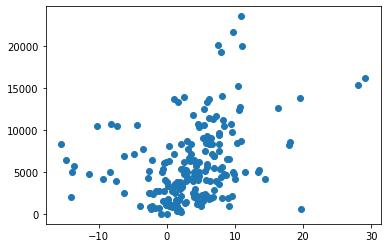

In [108]:
#visualize with scatter plot
plt.scatter(X, Y)

In [109]:
#z-score X and Y variables
Y_zscore = (gen_311_stats['Change in Total # of Calls'] - gen_311_stats['Change in Total # of Calls'].mean()) / gen_311_stats['Change in Total # of Calls'].std()
X_zscore = (gen_311_stats['gen_index_final_2'] - gen_311_stats['gen_index_final_2'].mean()) / gen_311_stats['gen_index_final_2'].std()

In [110]:
#run OLS with z-scored X and Y
modelz = sm.OLS(Y_zscore,X_zscore)
resultsz = modelz.fit()
print(resultsz.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Change in Total # of Calls   R-squared (uncentered):                   0.116
Model:                                    OLS   Adj. R-squared (uncentered):              0.111
Method:                         Least Squares   F-statistic:                              25.43
Date:                        Tue, 07 Dec 2021   Prob (F-statistic):                    1.05e-06
Time:                                22:38:50   Log-Likelihood:                         -264.18
No. Observations:                         195   AIC:                                      530.4
Df Residuals:                             194   BIC:                                      533.6
Df Model:                                   1                                                  
Covariance Type:                    nonrobust                                                  
                        coef    std err 

In [111]:
X_zscore.describe()

count    1.950000e+02
mean    -1.651101e-16
std      1.000000e+00
min     -2.990054e+00
25%     -4.863720e-01
50%      3.242162e-02
75%      5.159167e-01
max      3.974298e+00
Name: gen_index_final_2, dtype: float64